In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')


In [2]:
dataDirectory = '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/'
inputDirectory = '/data/mm10/Brain_MPSIIIA/ChIP/input/'
workingDirectory = '/home/h1bennet/mpsiiia/results/02_201128_Young_CellComp/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [62]:
paths = ['./great_analysis/results/olig2_intersect_act_peaks_GOBP.tsv',
         './great_analysis/results/neun_intersect_act_peaks_GOBP.tsv',
         './great_analysis/results/pu1_intersect_act_peaks_GOBP.tsv',
         './great_analysis/results/sox9_intersect_act_peaks_GOBP.tsv']
cells = ['Olig2', 'NeuN', 'PU1', 'Sox9']

In [64]:
color_dict = {'Olig2': '#31a354',
              'NeuN': '#dd1c77',
              'PU1': '#3182bd',
              'Sox9': '#e6550d'}

### Make individual plots

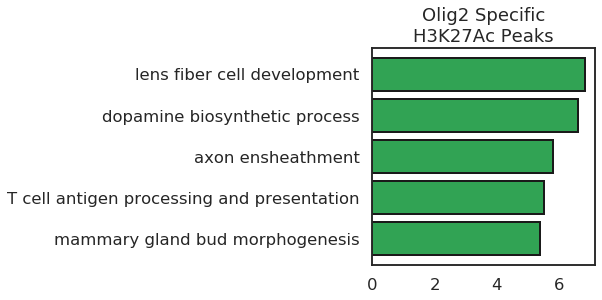

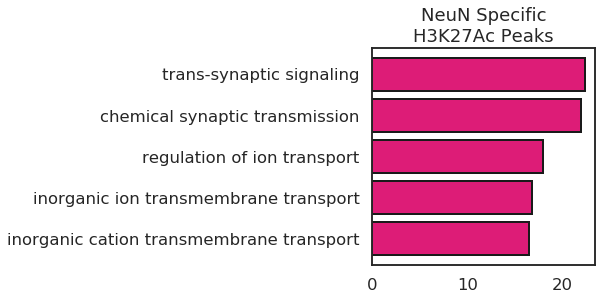

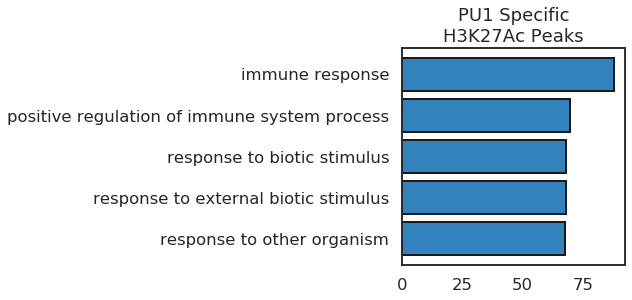

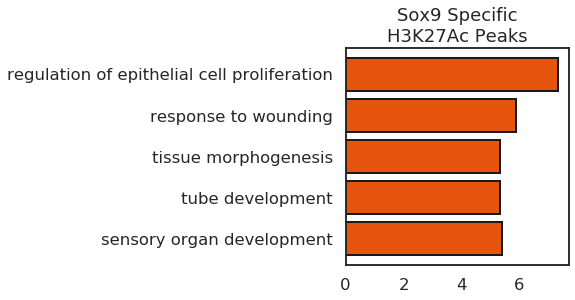

In [74]:
# select how many terms to plot
n_terms = 5

for path, cell in zip(paths, cells):
    
    # read in results
    df = pd.read_csv(path,
                 sep='\t',
                 skiprows=3)

    # set figure axis
    fig, ax = plt.subplots(figsize=(4,4))

    # create y index for plotting
    y = np.arange(n_terms)

    # plot data
    ax.barh(y,
            -np.log10(df.loc[:, 'HyperFdrQ'].iloc[:n_terms][::-1]),
            edgecolor='k',
            linewidth=2,
            color=color_dict[cell])

    # format plot
    ax.set_title(cell+' Specific\nH3K27Ac Peaks')
    ax.set_yticks(np.arange(len(y)));
    ax.set_yticklabels(df.loc[:, 'Desc'].iloc[:n_terms][::-1]);
    
    # save plot
    plt.savefig('./figures/'+cell+'_GREAT_GO_BiolProc_Top'+chr(n_terms)+'.png',
                bbox_inches='tight')

### Make shared plot

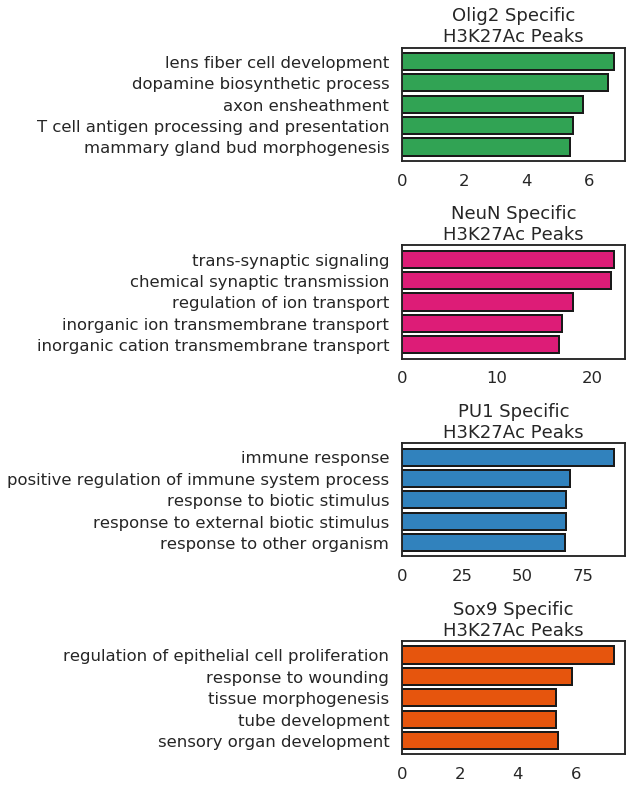

In [73]:
# select how many terms to plot
n_terms = 5

# initialize count
count=0

# make shared axis
fig, axs = plt.subplots(4, 1, figsize=(4,13))
plt.subplots_adjust(hspace = 0.75)

for path, cell, ax in zip(paths, cells, axs.flatten()):
    
    # read in results
    df = pd.read_csv(path,
                 sep='\t',
                 skiprows=3)
    
    # create y index for plotting
    y = np.arange(n_terms)

    # plot data
    ax.barh(y,
            -np.log10(df.loc[:, 'HyperFdrQ'].iloc[:n_terms][::-1]),
            edgecolor='k',
            linewidth=2,
            color=color_dict[cell])

    # format plot
    ax.set_title(cell+' Specific\nH3K27Ac Peaks')
    ax.set_yticks(np.arange(len(y)));
    ax.set_yticklabels(df.loc[:, 'Desc'].iloc[:n_terms][::-1]);
    
# save plot
plt.savefig('./figures/combined_GREAT_GO_BiolProc_Top'+chr(n_terms)+'.png',
            bbox_inches='tight')